In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from tensorflow import keras

from pylab import rcParams

from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

## setting parameters
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22,10


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [5]:
## loading data

data = pd.read_csv("Data/london_merged.csv", parse_dates=True, index_col='timestamp')

### Metadata:

    "timestamp" - timestamp field for grouping the data
    "cnt" - the count of a new bike shares
    "t1" - real temperature in C
    "t2" - temperature in C "feels like"
    "hum" - humidity in percentage
    "wind_speed" - wind speed in km/h
    "weather_code" - category of the weather
    "is_holiday" - boolean field - 1 holiday / 0 non holiday
    "is_weekend" - boolean field - 1 if the day is weekend
    "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
    
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [6]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
## creating new columns, like months and days

data['month'] = data.index.month  # months
data['date_of_month'] = data.index.day  # day of month
data['hour'] = data.index.hour  #hour of the day
data['day_of_week'] = data.index.day_of_week

In [13]:
data

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,date_of_month,hour,day_of_week
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,4,0,6
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,1,6
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,4,2,6
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,4,3,6
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1,3,19,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1,3,20,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,1,3,21,1


### Visualizing The Data

<AxesSubplot: xlabel='timestamp', ylabel='cnt'>

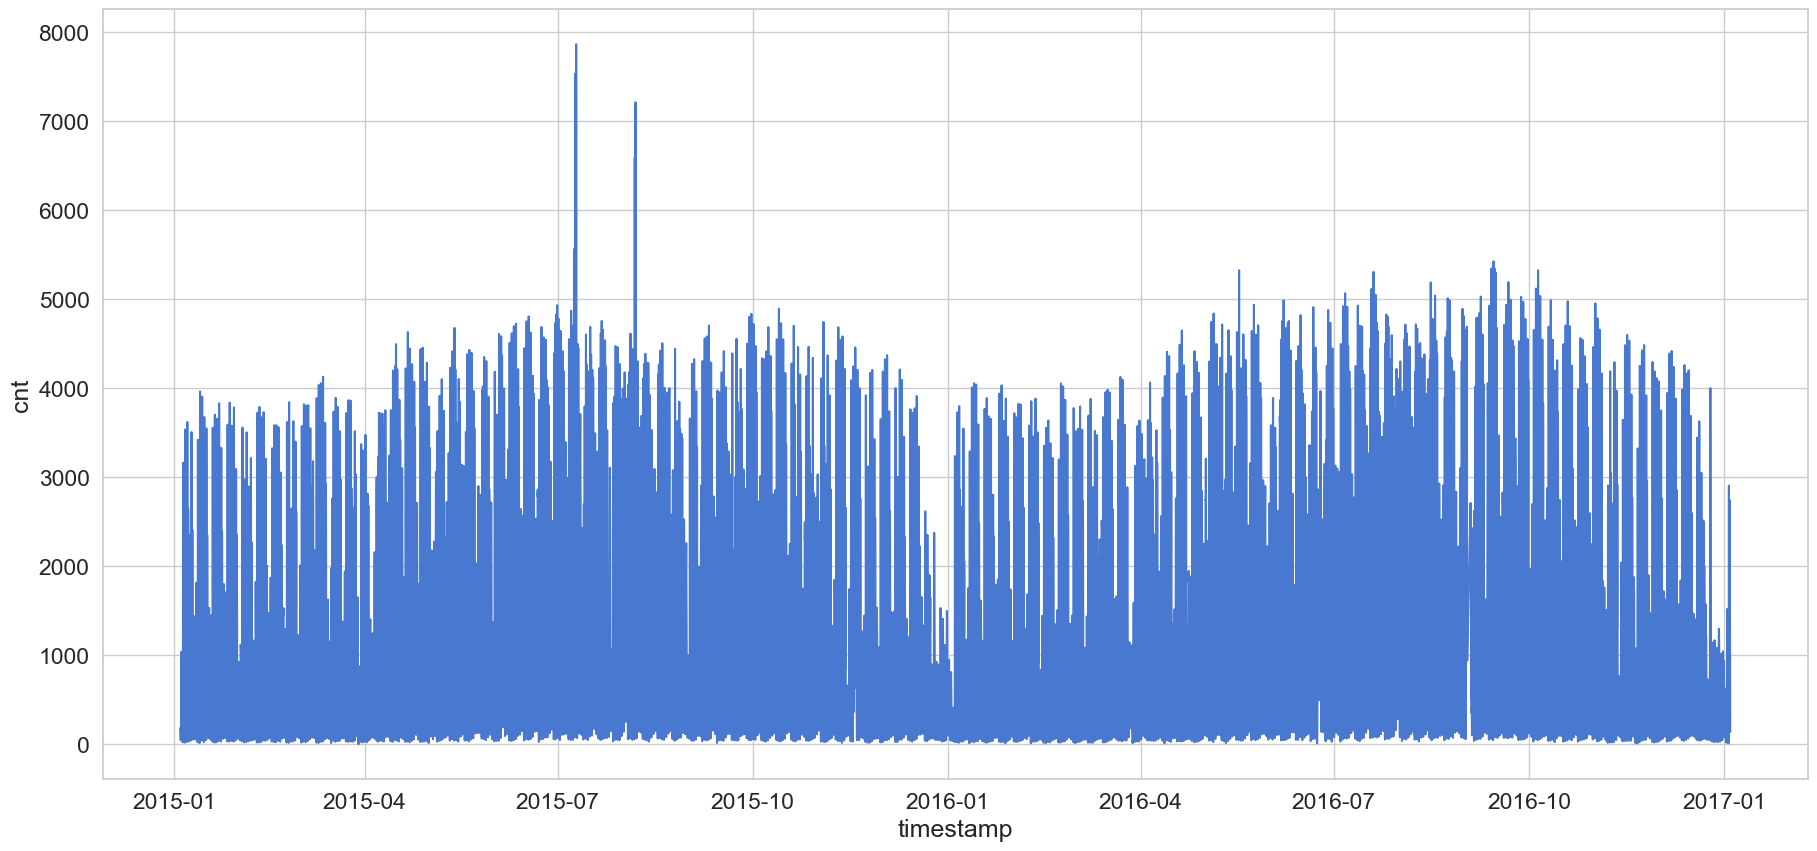

In [21]:
sns.lineplot(x = data.index, y = data.cnt, data = data)

<AxesSubplot: xlabel='month', ylabel='cnt'>

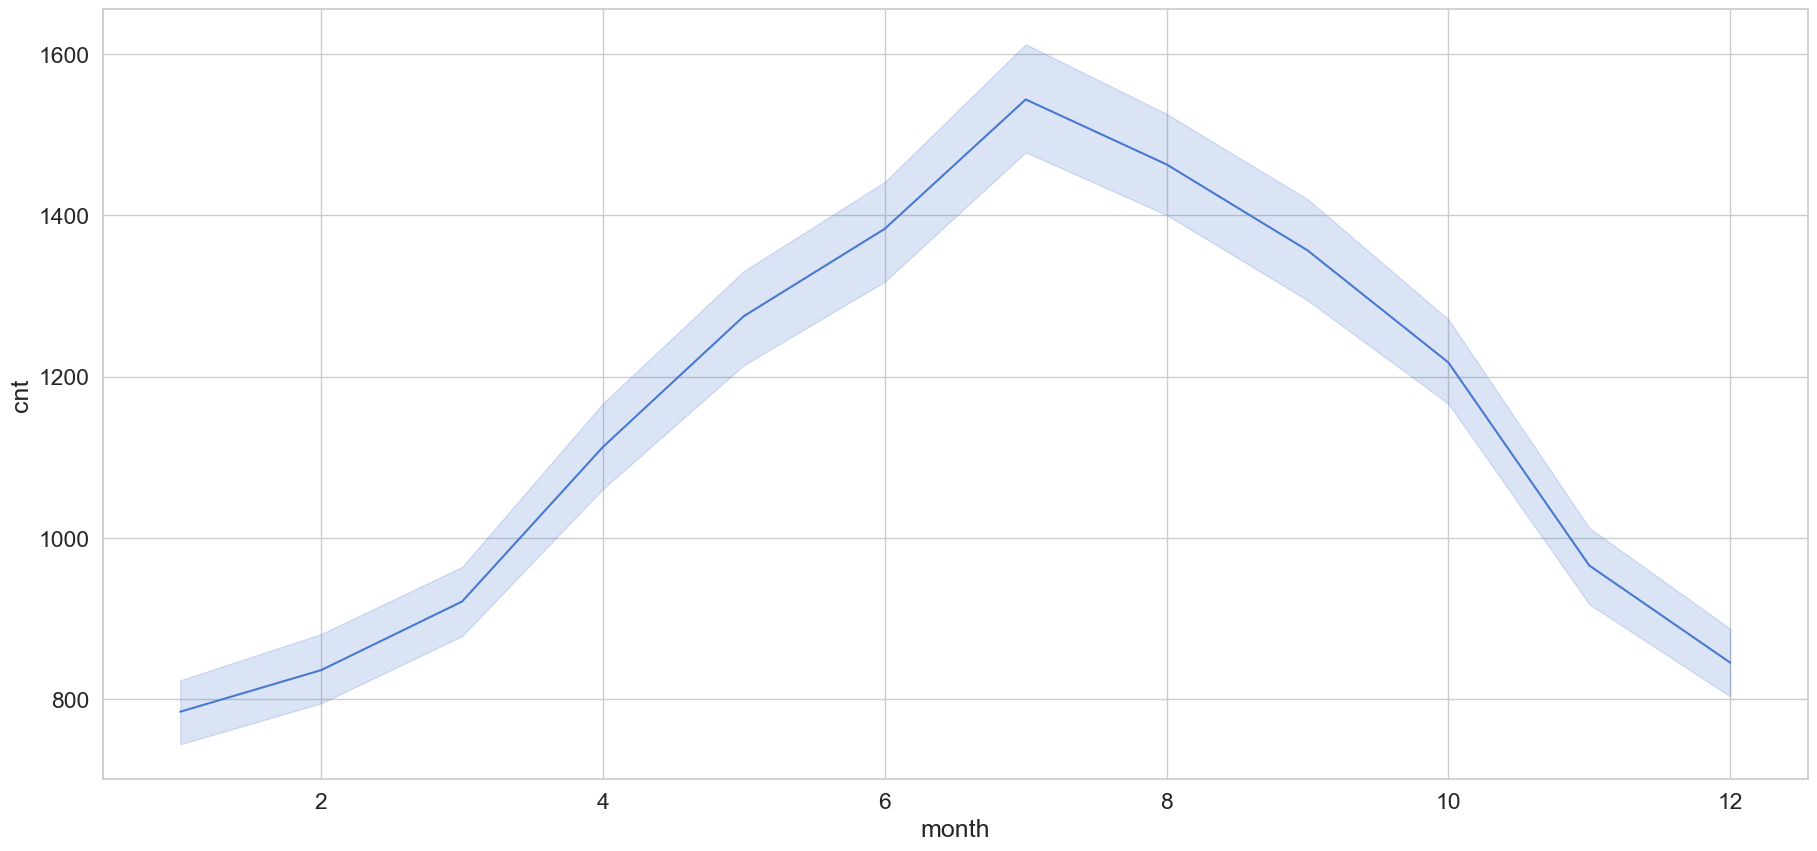

In [16]:
sns.lineplot(x = data.month, y = data.cnt, data = data)

<AxesSubplot: xlabel='timestamp', ylabel='cnt'>

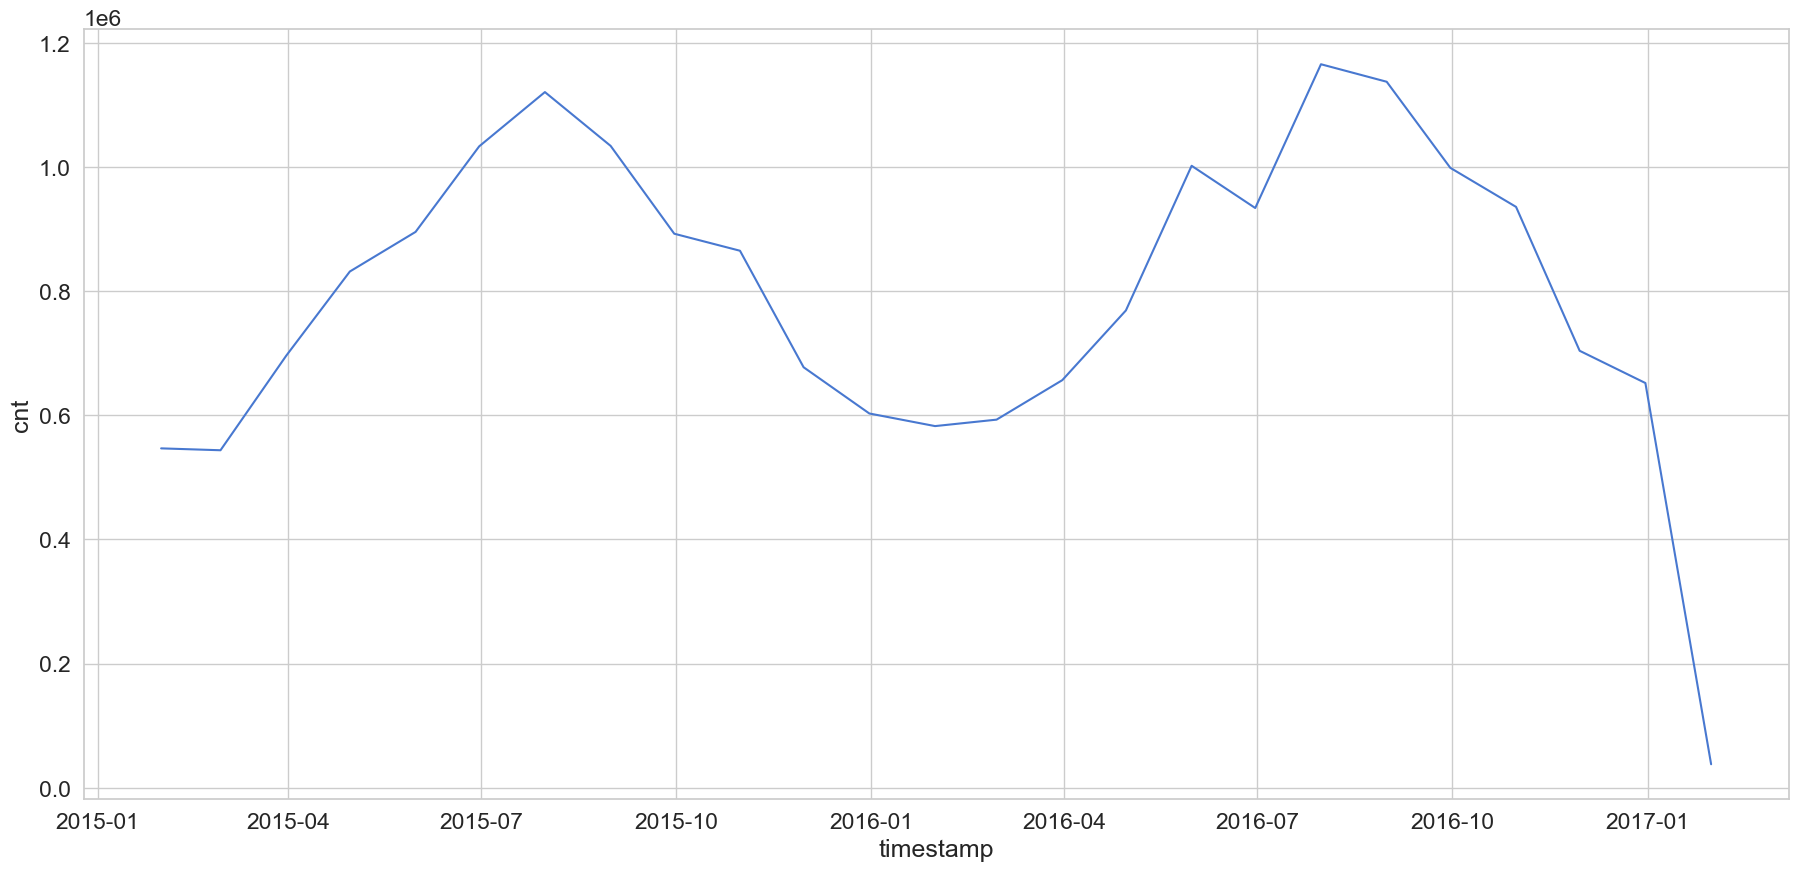

In [23]:
## plotting month by month

data_month = data.resample('M').sum()

sns.lineplot(x = data_month.index, y = data_month.cnt, data = data_month)

In [42]:
### plotting hour by hour


data_hour = data.groupby('hour')['cnt'].sum().reset_index()
data_hour.head(2)

,hour,cnt
0,0,210401
1,1,145257


<AxesSubplot: xlabel='hour', ylabel='cnt'>

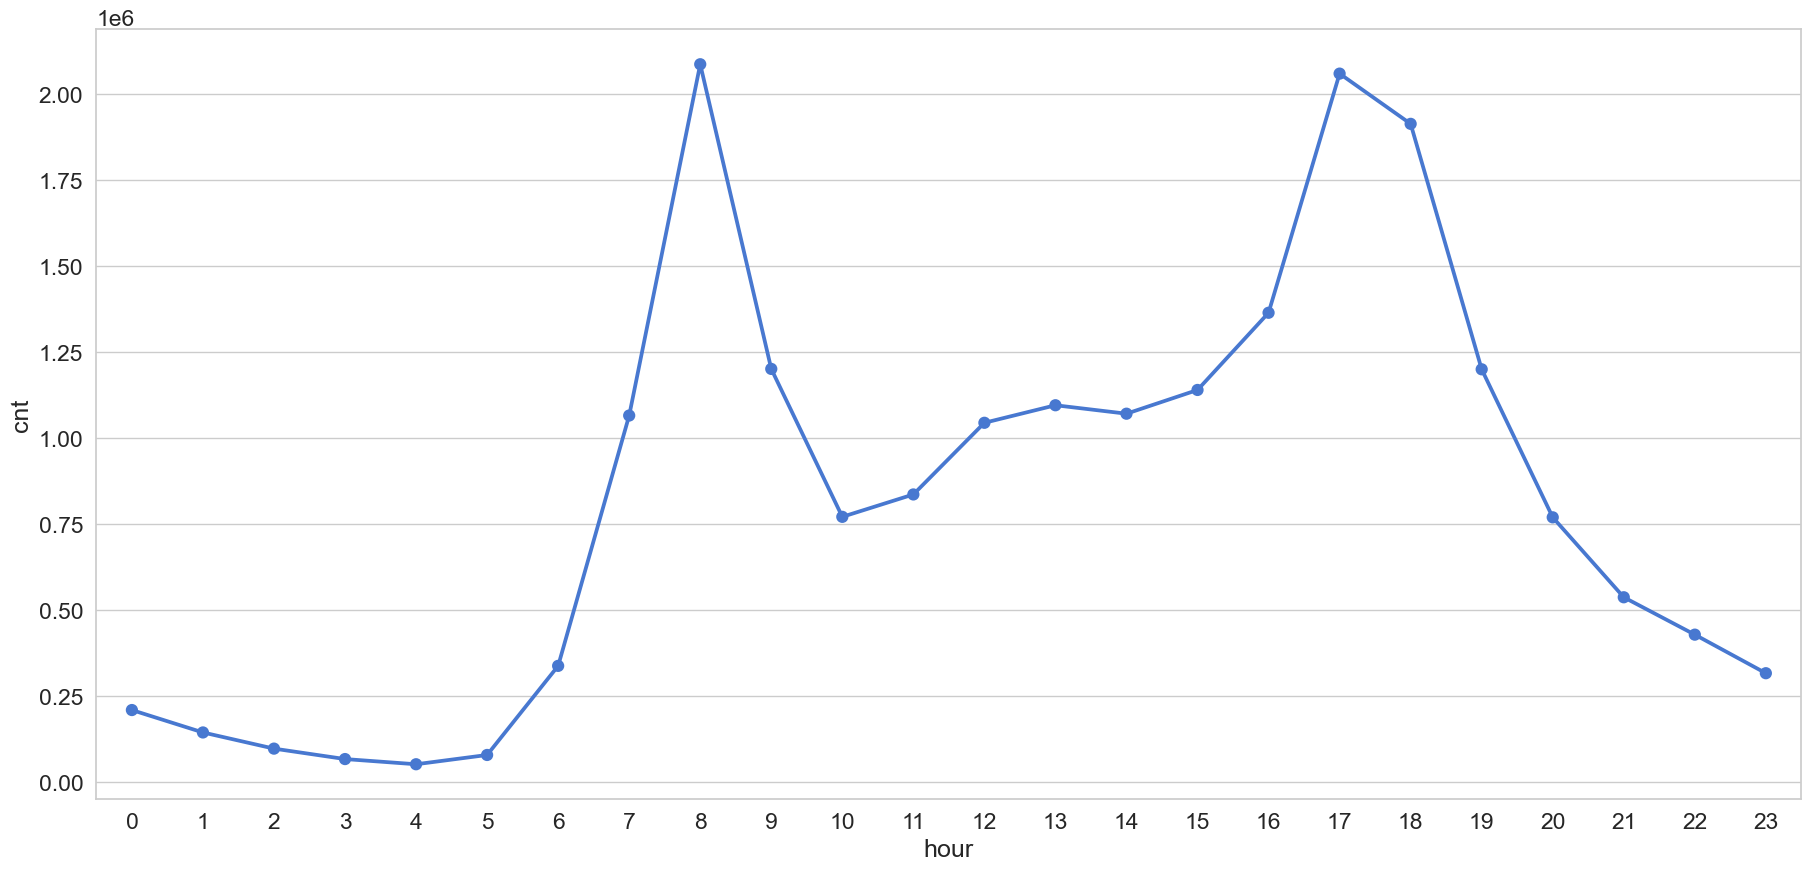

In [36]:
## point plot hourwise

sns.pointplot(data = data_hour, x = data_hour.hour, y = data_hour.cnt)

<AxesSubplot: xlabel='hour', ylabel='cnt'>

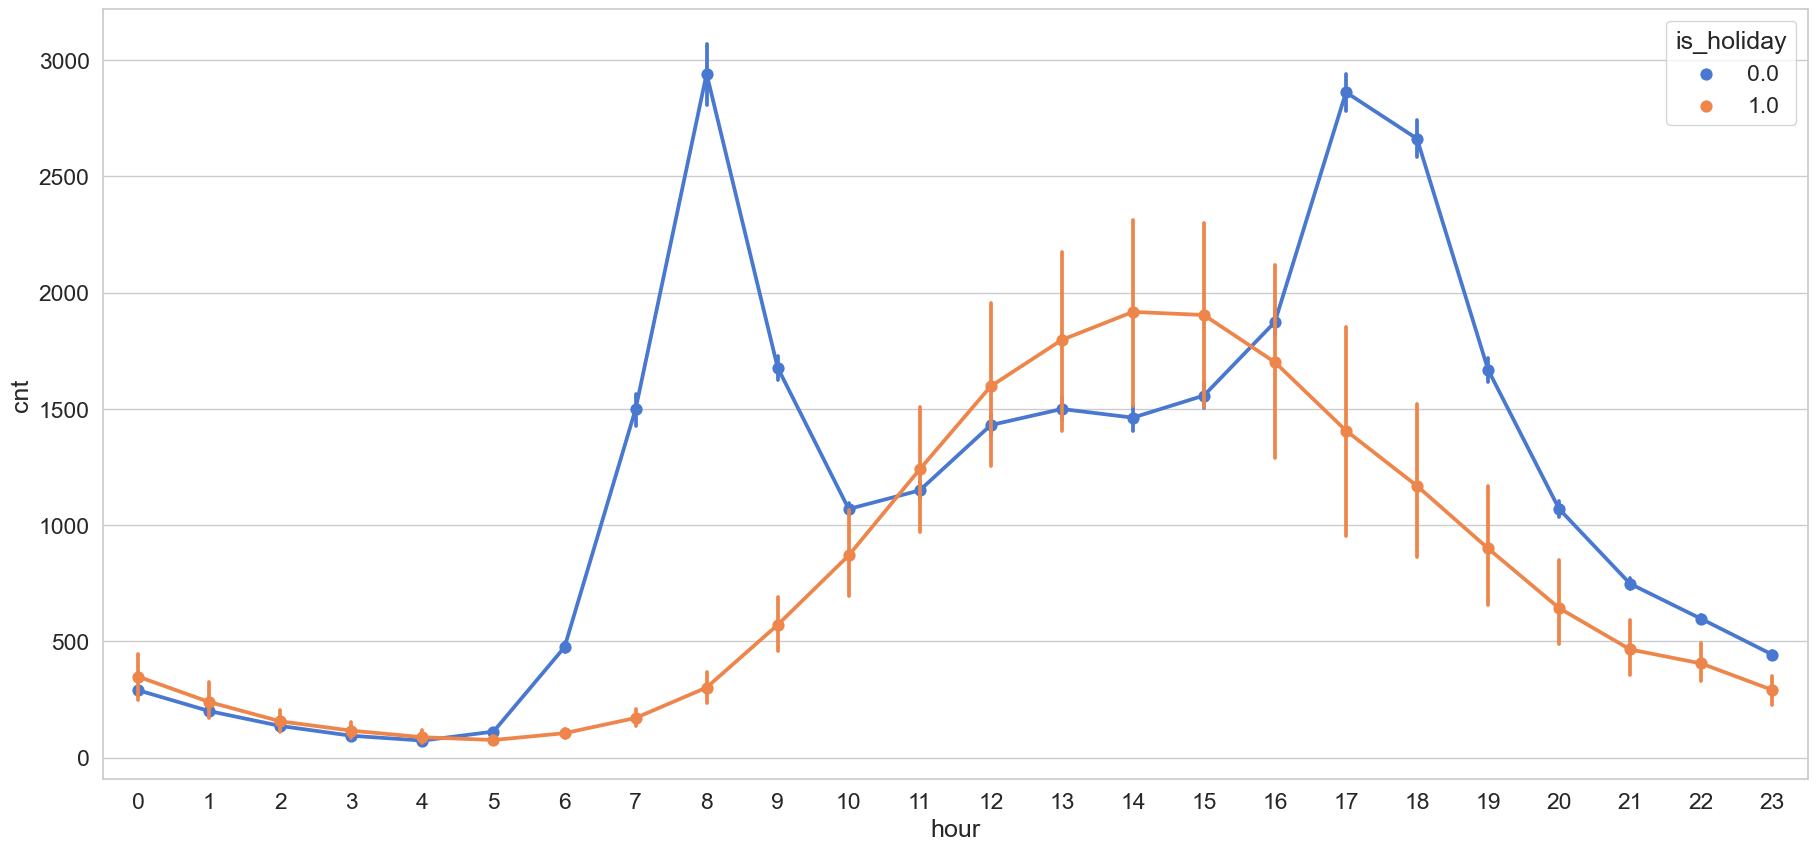

In [43]:
## how the hourly bike sharing is effected by weekend or holiday

sns.pointplot(data = data, 
              x = data.hour,
              y = data.cnt,
              hue = data.is_holiday)

<AxesSubplot: xlabel='hour', ylabel='cnt'>

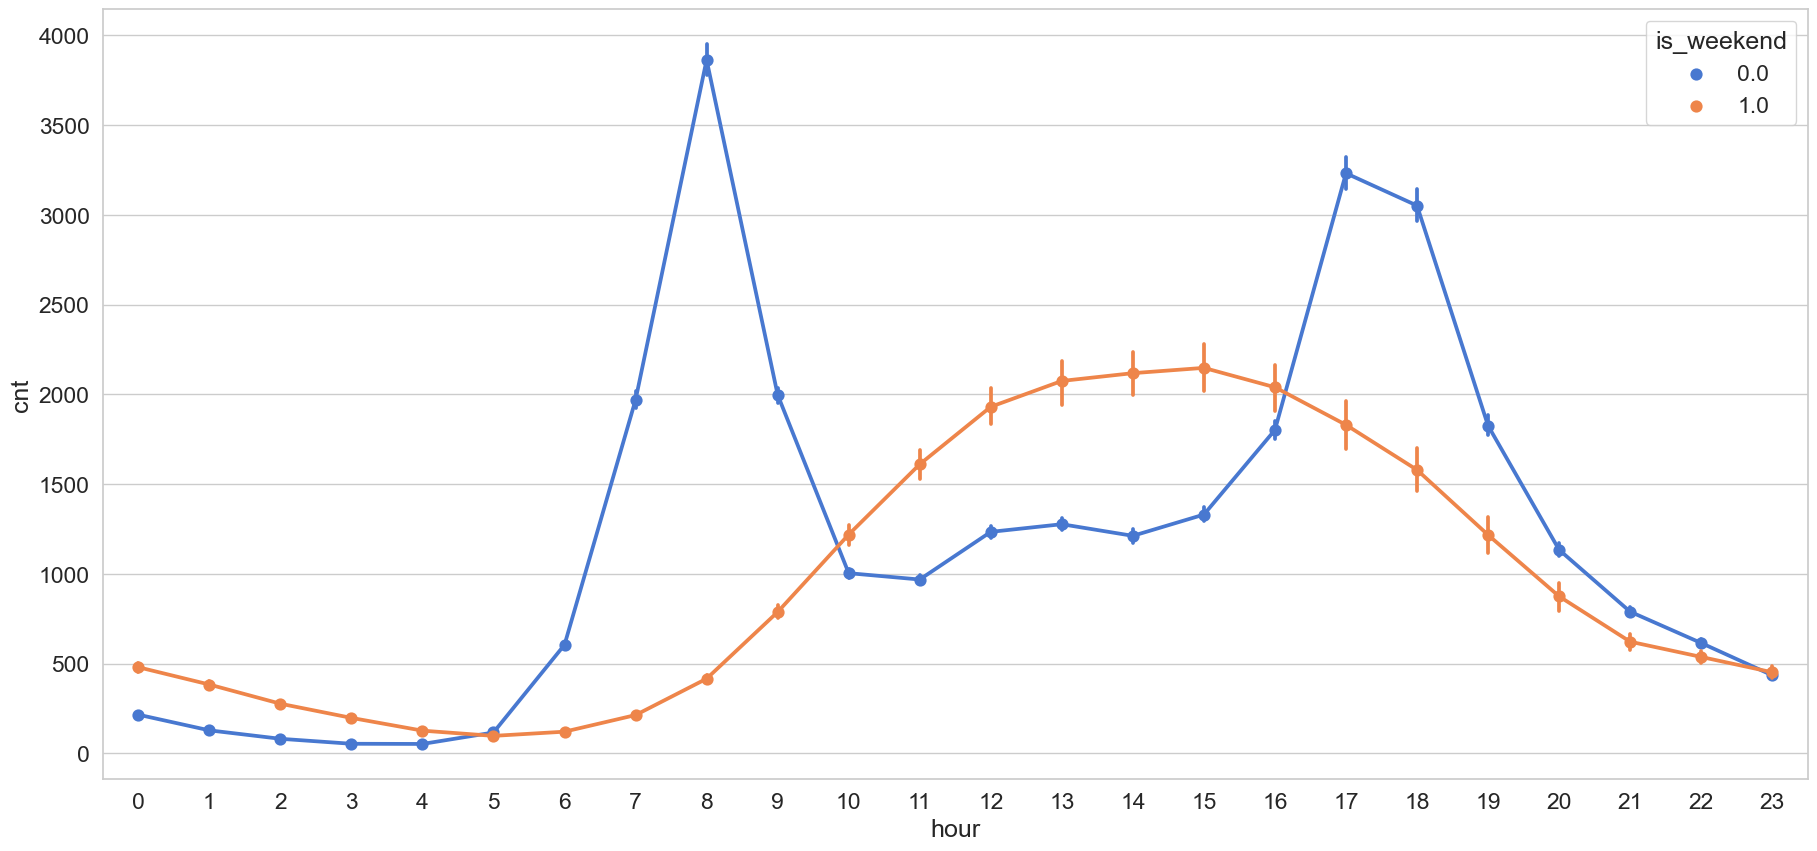

In [44]:
## how the hourly bike sharing is effected by weekend or holiday

sns.pointplot(data = data, 
              x = data.hour,
              y = data.cnt,
              hue = data.is_weekend)

<AxesSubplot: xlabel='day_of_week', ylabel='cnt'>

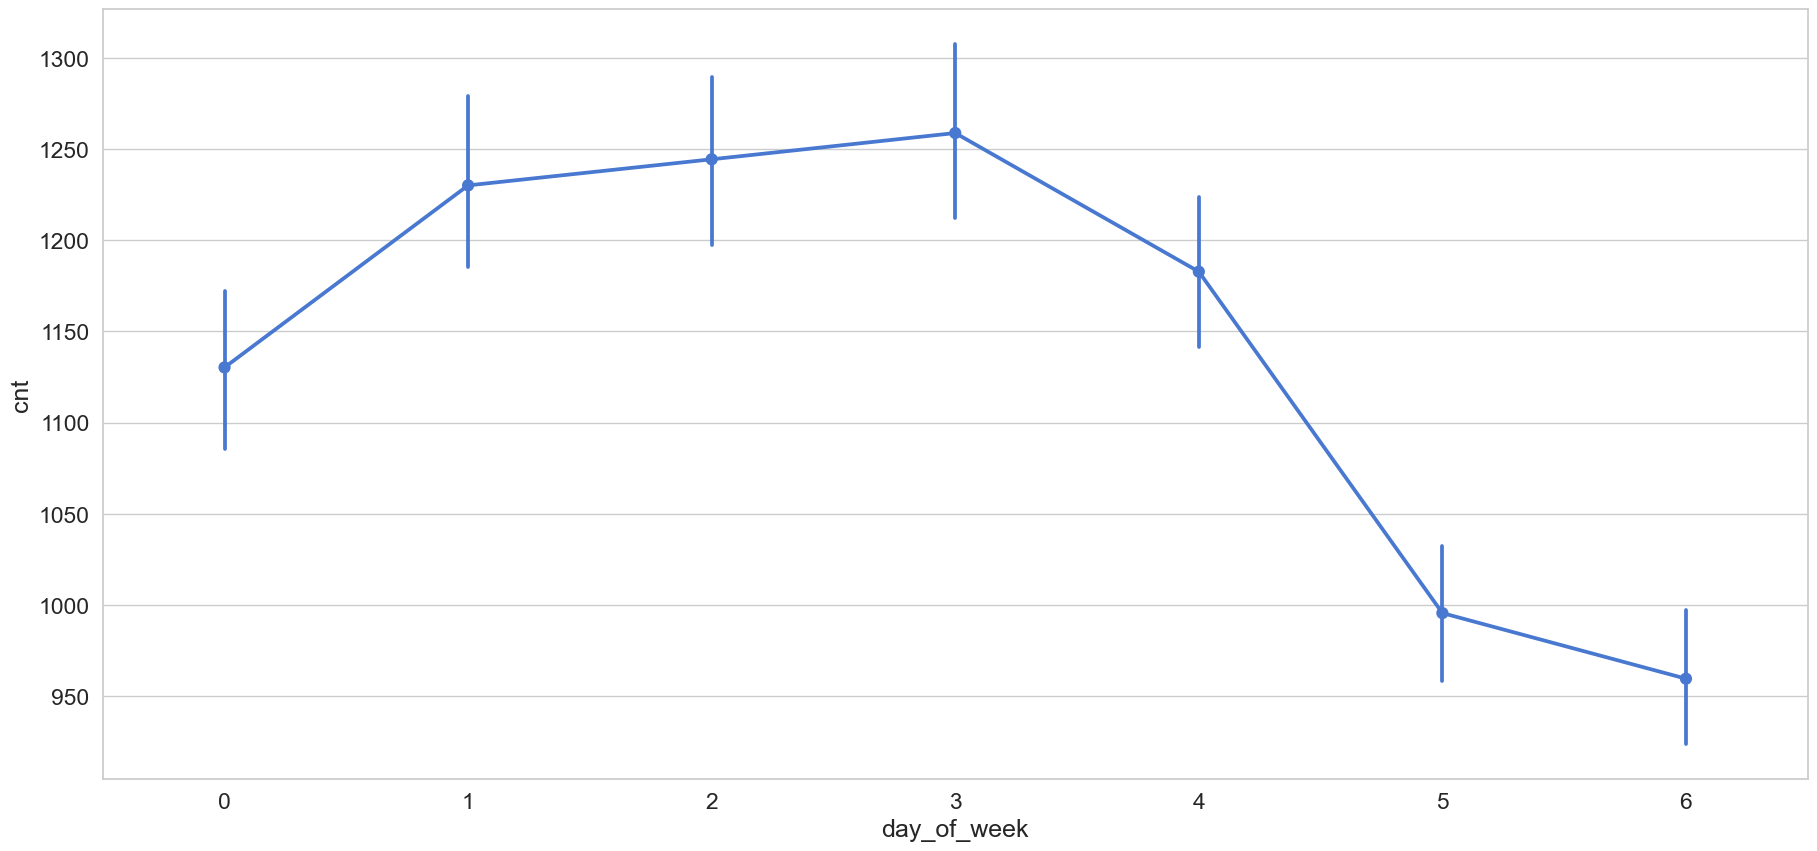

In [47]:
## how bike sharing varies along with weekdays

sns.pointplot(data = data,
              x = data.day_of_week,
              y = data.cnt)

<AxesSubplot: xlabel='hour', ylabel='cnt'>

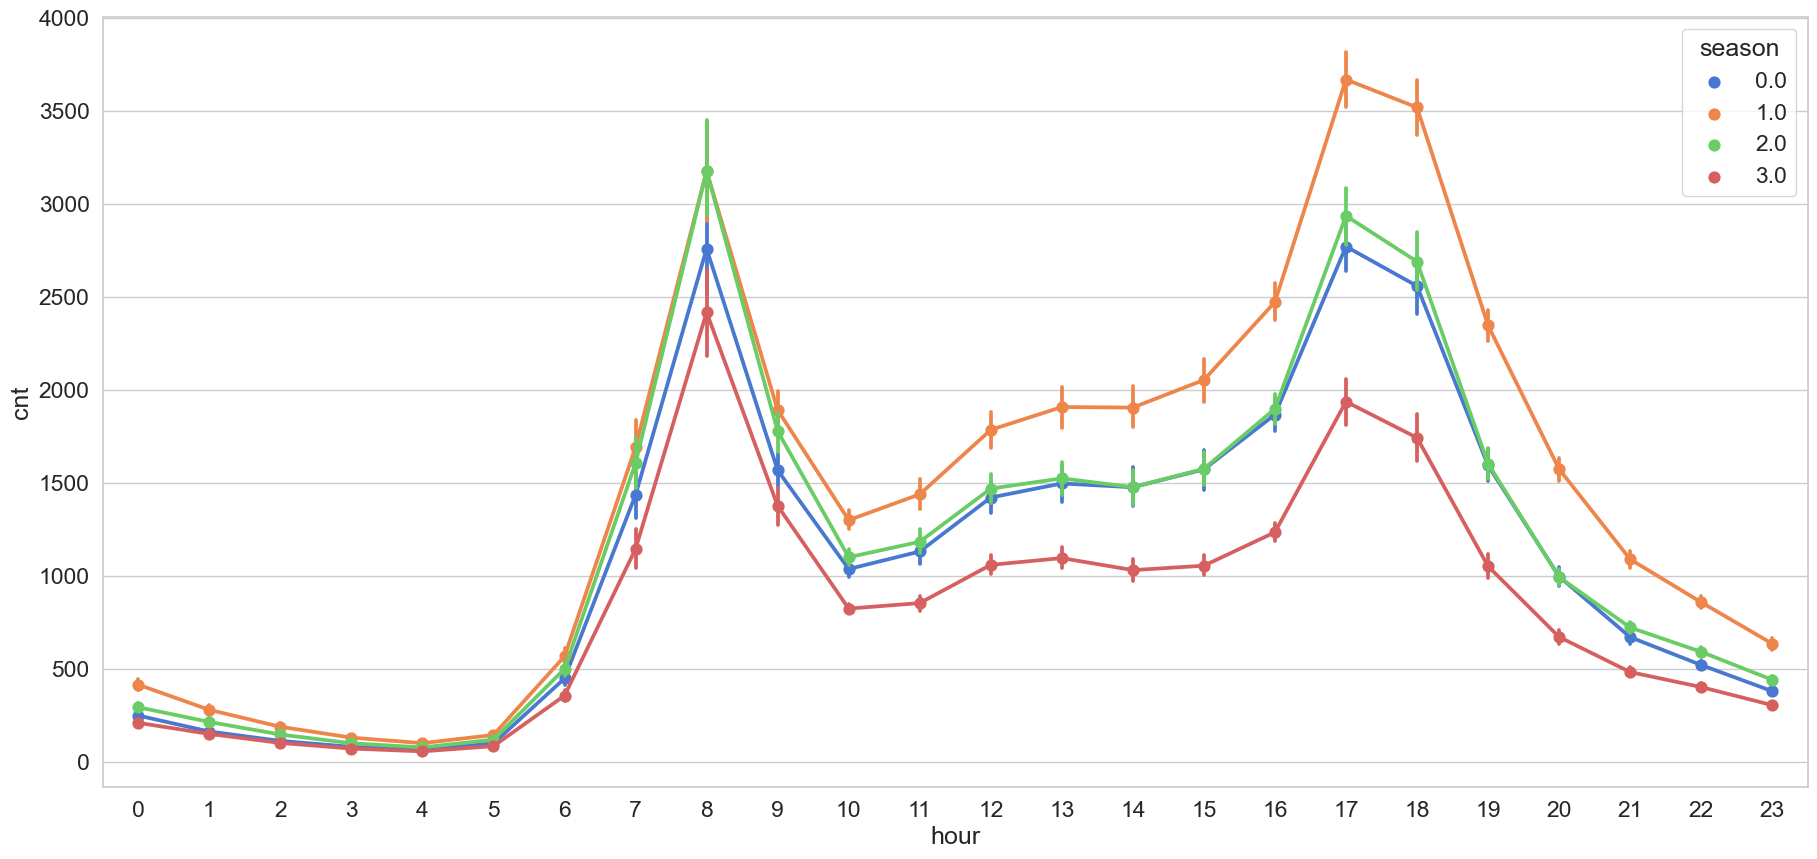

In [53]:
## how weather is effecting in the bike sharing 

sns.pointplot(data = data,
             x = data.hour,
             y = data.cnt,
             hue = data.season)

### Split Data

In [56]:
train_size = int(len(data) * .90)
test_size = len(data) - train_size


train, test = data.iloc[0:train_size], data.iloc[train_size:]

print(train.shape, test.shape)

(15672, 13) (1742, 13)


### Transforming Data

In [63]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed'] #featured columns

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

##training
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

##testing
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

C:\Users\saiba\AppData\Local\Temp\ipykernel_13088\927455126.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
C:\Users\saiba\AppData\Local\Temp\ipykernel_13088\927455126.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = cnt_transformer.transform(train[['cnt']])
C:\Users\saiba\AppData\Local\Temp\ipykernel_13088\927455126.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [62]:
# train
# test

### Creating DataSet

*  **converting dataset into the format :**         
       
       [samples, time_steps, n_features]

In [64]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i+time_steps)].to_numpy()
        Xs.append(v)
        u = y.iloc[i: (i+time_steps)].to_numpy()
        ys.append(u)
    return np.array(Xs), np.array(ys)    

In [65]:
TIME_STEPS = 24

X_train, y_train = create_dataset(train, train.cnt, time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test, test.cnt, time_steps=TIME_STEPS)

In [67]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15648, 24, 13) (15648, 24) (1718, 24, 13) (1718, 24)


In [70]:
# X_train[0]

### Creating Model - Bidirectional LSTM model

In [71]:
model = keras.Sequential()

model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units= 128,
            input_shape = (X_train.shape[1], X_train.shape[2])
        )
    )
)

model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(1)) 

In [72]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 100,
    batch_size = 32,
    shuffle=False,
    validation_split=0.25,
    verbose = 1 
)

Epoch 1/100
367/367 [==============================] - 13s 35ms/step - loss: 0.4654 - val_loss: 0.7397
Epoch 2/100
367/367 [==============================] - 13s 37ms/step - loss: 0.4645 - val_loss: 0.7308
Epoch 3/100
367/367 [==============================] - 13s 35ms/step - loss: 0.4633 - val_loss: 0.7276
Epoch 4/100
367/367 [==============================] - 13s 35ms/step - loss: 0.4628 - val_loss: 0.7335
Epoch 5/100
367/367 [==============================] - 13s 35ms/step - loss: 0.4622 - val_loss: 0.7364
Epoch 6/100
367/367 [==============================] - 12s 34ms/step - loss: 0.4618 - val_loss: 0.7424
Epoch 7/100
367/367 [==============================] - 12s 33ms/step - loss: 0.4611 - val_loss: 0.7446
Epoch 8/100
367/367 [==============================] - 13s 35ms/step - loss: 0.4611 - val_loss: 0.7415
Epoch 9/100
367/367 [==============================] - 13s 35ms/step - loss: 0.4601 - val_loss: 0.7366
Epoch 10/100
367/367 [==============================] - 13s 34ms/step - l

In [ ]:
## plotting results

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()